In [1]:
import numpy as np
import pandas as pd
import requests
import plotly.express as px
from matplotlib import pyplot as plt

In [2]:
#load the data and take a look
url = "https://github.com/TianliangTao/Project/blob/main/movie/movie.csv?raw=true"
df = pd.read_csv(url)

In [3]:
df.head()

,Movies,Domestic,International,Worldwild,Distributor,Opening,Budget,Release_Date,MPAA,Runing_Time,Genres
0,Dear John,"$80,014,842","$34,969,824","$114,984,666",Screen Gems,"$30,468,614","$25,000,000","Feb 5, 2010",PG-13,1 hr 48 min,Drama\n \n Mystery\n \n Ro...
1,Eat Pray Love,"$80,574,010","$124,020,006","$204,594,016",Sony Pictures Entertainment (SPE),"$23,104,523","$60,000,000","Aug 13, 2010",PG-13,2 hr 13 min,Biography\n \n Drama\n \n ...
2,Avatar,"$749,766,139","$1,993,811,448","$2,743,577,587",Twentieth Century Fox,"$77,025,481","$237,000,000","Dec 18, 2009",PG-13,2 hr 42 min,Action\n \n Adventure\n \n ...
3,The Circle,"$20,497,844","$20,158,555","$40,656,399",STX Entertainment,"$9,034,148","$18,000,000","Apr 28, 2017",PG-13,1 hr 50 min,Drama\n \n Sci-Fi\n \n Thr...
4,Little Fockers,"$148,438,600","$162,211,985","$310,650,585",Universal Pictures,"$30,833,665","$100,000,000","Dec 22, 2010",PG-13,1 hr 38 min,Comedy\n \n Romance


In [4]:
type(df['Domestic'][1])

str

In [5]:
# Check distributors
pd.unique(df['Distributor'])

array(['Screen Gems', 'Sony Pictures Entertainment (SPE)',
       'Twentieth Century Fox', 'STX Entertainment', 'Universal Pictures',
       'Paramount Pictures', 'Lionsgate', 'Open Road Films (II)',
       'Warner Bros.', 'A24', 'Walt Disney Studios Motion Pictures',
       'Sony Pictures Classics', 'Clarius Entertainment',
       'TriStar Pictures', 'Fox Searchlight Pictures',
       'Freestyle Releasing', 'Relativity Media', 'Focus Features',
       'BH Tilt', 'Broad Green Pictures', 'EuropaCorp',
       'The Weinstein Company', 'Newmarket Films', 'Roadside Attractions',
       'Rocky Mountain Pictures', 'DreamWorks', 'Summit Entertainment',
       'FilmDistrict', 'Dimension Films', 'CBS Films',
       'Picturehouse (II)', 'Walt Disney Pictures',
       'United Artists Releasing', 'New Line Cinema',
       '20th Century Studios', 'Affirm Films', 'Cinelou Films',
       'Entertainment Studios Motion Pictures',
       'The Samuel Goldwyn Company', 'Bleecker Street Media',
       'Avir

In [6]:
# Check how many movies have nan in the data
df.isnull().sum()

Movies             0
Domestic           1
International    332
Worldwild          1
Distributor        1
Opening            1
Budget             1
Release_Date       1
MPAA               1
Runing_Time        1
Genres             1
dtype: int64

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
import sys
sys.path.append('/content/gdrive/MyDrive/box office/modules')

In [9]:
import data_clean1

In [10]:
df1 = data_clean1.prepare_data(df)
df1.head()

,Domestic,International,Worldwide,Opening,Budget,Running_Time,Distributor_20th Century Studios,Distributor_8x Entertainment,Distributor_A24,Distributor_Affirm Films,...,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western
0,0.059205,-0.355290,-0.215477,0.324183,-0.617956,-0.114040,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
1,0.065472,0.194265,0.153797,0.050126,0.073894,1.189552,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,7.564938,11.733295,10.616779,2.056807,3.572678,2.701719,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.607787,-0.446695,-0.521779,-0.473506,-0.756326,-0.009753,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.826013,0.429959,0.590849,0.337768,0.864579,-0.635477,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
import train_test

In [12]:
train,val,test = train_test.make_dataset(df1)

In [13]:
train.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 160), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [14]:
import model
model1 = model.create_model(160)
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 356)               57316     
                                                                 
 dropout (Dropout)           (None, 356)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               91392     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 148,965
Trainable params: 148,965
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model1.fit(train, validation_data = val, epochs = 100)

Epoch 1/100
100/100 [==============================] - 3s 10ms/step - loss: 3.4023 - mean_squared_logarithmic_error: 0.0071 - val_loss: 0.9402 - val_mean_squared_logarithmic_error: 0.0019
Epoch 2/100
100/100 [==============================] - 1s 7ms/step - loss: 0.5054 - mean_squared_logarithmic_error: 0.0025 - val_loss: 0.2942 - val_mean_squared_logarithmic_error: 0.0013
Epoch 3/100
100/100 [==============================] - 1s 8ms/step - loss: 0.2286 - mean_squared_logarithmic_error: 0.0021 - val_loss: 0.1788 - val_mean_squared_logarithmic_error: 6.4943e-04
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1717 - mean_squared_logarithmic_error: 0.0018 - val_loss: 0.1430 - val_mean_squared_logarithmic_error: 3.2540e-04
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1541 - mean_squared_logarithmic_error: 0.0021 - val_loss: 0.1349 - val_mean_squared_logarithmic_error: 8.0469e-04
Epoch 6/100
100/100 [==============================]

In [16]:
model1.evaluate(test)

29/29 [==============================] - 0s 2ms/step - loss: 0.0902 - mean_squared_logarithmic_error: 4.8677e-05


[0.09019314497709274, 4.867652023676783e-05]

In [17]:
test_predictions = model1.predict(test).flatten()
test_true = np.concatenate([y for x, y in test], axis=0)

In [18]:
fig = px.scatter(x = test_true, y = test_predictions)
fig.update_layout(
    width = 1000,
    height = 1000,
    yaxis_range=[-1,7],
    xaxis_range=[-1,7]
  )
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
fig.show()

Try a new model without the domestic and international box office features

In [19]:
def prepare_data_2(data):
  """
  
  """
  # Take a copy first
  df = data_clean1.prepare_data(data)
  df = df.drop(columns = ['Domestic', 'International'])

  return df

In [20]:
df2 = prepare_data_2(df)
df2.head()

,Worldwide,Opening,Budget,Running_Time,Distributor_20th Century Studios,Distributor_8x Entertainment,Distributor_A24,Distributor_Affirm Films,Distributor_Anchor Bay Films,Distributor_Apparition,...,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western
0,-0.215477,0.324183,-0.617956,-0.114040,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
1,0.153797,0.050126,0.073894,1.189552,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,10.616779,2.056807,3.572678,2.701719,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.521779,-0.473506,-0.756326,-0.009753,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.590849,0.337768,0.864579,-0.635477,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
train,val,test = train_test.make_dataset(df2)

In [22]:
model2 = model.create_model(158)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 356)               56604     
                                                                 
 dropout_1 (Dropout)         (None, 356)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               91392     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 148,253
Trainable params: 148,253
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model2.fit(train, validation_data = val, epochs = 100)

Epoch 1/100
100/100 [==============================] - 1s 5ms/step - loss: 3.8451 - mean_squared_logarithmic_error: 0.0286 - val_loss: 1.5086 - val_mean_squared_logarithmic_error: 0.0183
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 1.1051 - mean_squared_logarithmic_error: 0.0265 - val_loss: 0.6495 - val_mean_squared_logarithmic_error: 0.0219
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 0.6117 - mean_squared_logarithmic_error: 0.0235 - val_loss: 0.4285 - val_mean_squared_logarithmic_error: 0.0215
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.4993 - mean_squared_logarithmic_error: 0.0249 - val_loss: 0.4516 - val_mean_squared_logarithmic_error: 0.0270
Epoch 5/100
100/100 [==============================] - 0s 5ms/step - loss: 0.3874 - mean_squared_logarithmic_error: 0.0240 - val_loss: 0.3197 - val_mean_squared_logarithmic_error: 0.0285
Epoch 6/100
100/100 [==============================] - 0s 4ms/ste

In [24]:
model2.evaluate(test)

29/29 [==============================] - 0s 2ms/step - loss: 0.1768 - mean_squared_logarithmic_error: 0.0148


[0.1768096685409546, 0.014769657514989376]

In [25]:
test_predictions = model2.predict(test).flatten()
test_true = np.concatenate([y for x, y in test], axis=0)
fig = px.scatter(x = test_true, y = test_predictions)
fig.update_layout(
    width = 1000,
    height = 1000,
    yaxis_range=[-1,7],
    xaxis_range=[-1,7]
  )
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
fig.show()

For visualization purpose, do not normalize the data

In [26]:
import data_clean2
df3 = data_clean2.prepare_data_without_normalize(df)
train,val,test = train_test.make_dataset(df3)

In [27]:
model3 = model.create_model(158)
history = model3.fit(train, validation_data = val, epochs = 100)

Epoch 1/100
100/100 [==============================] - 1s 6ms/step - loss: 19762347119738880.0000 - mean_squared_logarithmic_error: 2.2316 - val_loss: 18163030147727360.0000 - val_mean_squared_logarithmic_error: 0.6162
Epoch 2/100
100/100 [==============================] - 0s 5ms/step - loss: 11856038177275904.0000 - mean_squared_logarithmic_error: 0.6789 - val_loss: 12339125361311744.0000 - val_mean_squared_logarithmic_error: 1.0730
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 11642866065473536.0000 - mean_squared_logarithmic_error: 0.6838 - val_loss: 6975626036641792.0000 - val_mean_squared_logarithmic_error: 0.4261
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 15984716150734848.0000 - mean_squared_logarithmic_error: 0.6861 - val_loss: 6918101929033728.0000 - val_mean_squared_logarithmic_error: 0.4853
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 13566602318446592.0000 - mean_squared_logarithmic_e

In [28]:
test_predictions = model3.predict(test).flatten()
test_true = np.concatenate([y for x, y in test], axis=0)
fig = px.scatter(x = test_true, y = test_predictions)
fig.update_layout(
    width = 1000,
    height = 1000,
    yaxis_range=[0,2000000000],
    xaxis_range=[0,2000000000]
  )
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
fig.show()

Model performance is not so good, add more features into our data to improve the performance.

In [29]:
added_df = pd.DataFrame(columns=[])
added_df

""


In [30]:
movie_name = "Goosebumps 2: Slappy's Revenge"
response = requests.get('https://api.themoviedb.org/3/search/movie?api_key=c856b5dd6e0385ee3a021059a0a6cca1&query='+movie_name)
responded = response.json()
try:
  added_info = pd.DataFrame({'Original_Language': [responded['results'][0]['original_language']], 'Popularity': [responded['results'][0]['popularity']]})
except:
  added_info = pd.DataFrame(np.nan, index= [0], columns=['Original_Language', 'Popularity'])
added_info

,Original_Language,Popularity
0,NaN,NaN


In [31]:
df[df['Movies']=="Goosebumps 2: Slappy's Revenge"]

,Movies,Domestic,International,Worldwild,Distributor,Opening,Budget,Release_Date,MPAA,Runing_Time,Genres
1097,Goosebumps 2: Slappy's Revenge,"$46,700,633","$46,619,747","$93,320,380",Sony Pictures Entertainment (SPE),"$15,802,225","$35,000,000","Oct 12, 2018",PG,1 hr 30 min,Adventure\n \n Comedy\n \n ...


In [32]:
added_df = added_df.append(added_info, ignore_index = True)
added_df

,Original_Language,Popularity
0,NaN,NaN


In [33]:
added_df = pd.DataFrame(columns=[])

for movie_name in df['Movies']:
  response = requests.get('https://api.themoviedb.org/3/search/movie?api_key=c856b5dd6e0385ee3a021059a0a6cca1&query='+movie_name)
  responded = response.json()
  try:
    added_info = pd.DataFrame({'Original_Language': [responded['results'][0]['original_language']], 'Popularity': [responded['results'][0]['popularity']]})
  except:
    added_info = pd.DataFrame(np.nan, index = [0], columns=['Original_Language', 'Popularity'])

  added_df = added_df.append(added_info)


In [35]:
added_df = added_df.reset_index()
added_df

,index,Original_Language,Popularity
0,0,en,19.709
1,0,en,21.976
2,0,en,425.719
3,0,en,25.199
4,0,en,26.120
...,...,...,...
2851,0,en,12.002
2852,0,en,21.465
2853,0,en,72.148
2854,0,en,30.398


In [36]:
df['Original_Language'] = added_df['Original_Language']
df['Popularity'] = added_df['Popularity']

In [37]:
df.head()

,Movies,Domestic,International,Worldwild,Distributor,Opening,Budget,Release_Date,MPAA,Runing_Time,Genres,Original_Language,Popularity
0,Dear John,"$80,014,842","$34,969,824","$114,984,666",Screen Gems,"$30,468,614","$25,000,000","Feb 5, 2010",PG-13,1 hr 48 min,Drama\n \n Mystery\n \n Ro...,en,19.709
1,Eat Pray Love,"$80,574,010","$124,020,006","$204,594,016",Sony Pictures Entertainment (SPE),"$23,104,523","$60,000,000","Aug 13, 2010",PG-13,2 hr 13 min,Biography\n \n Drama\n \n ...,en,21.976
2,Avatar,"$749,766,139","$1,993,811,448","$2,743,577,587",Twentieth Century Fox,"$77,025,481","$237,000,000","Dec 18, 2009",PG-13,2 hr 42 min,Action\n \n Adventure\n \n ...,en,425.719
3,The Circle,"$20,497,844","$20,158,555","$40,656,399",STX Entertainment,"$9,034,148","$18,000,000","Apr 28, 2017",PG-13,1 hr 50 min,Drama\n \n Sci-Fi\n \n Thr...,en,25.199
4,Little Fockers,"$148,438,600","$162,211,985","$310,650,585",Universal Pictures,"$30,833,665","$100,000,000","Dec 22, 2010",PG-13,1 hr 38 min,Comedy\n \n Romance,en,26.120


In [38]:
import data_clean3
df4 = data_clean3.prepare_data_3(df)
train,val,test = train_test.make_dataset(df4)
model4 = model.create_model(182)
history = model4.fit(train, validation_data = val, epochs = 40)

Epoch 1/40
100/100 [==============================] - 1s 6ms/step - loss: 18113208527093760.0000 - mean_squared_logarithmic_error: 3.1832 - val_loss: 9622289037393920.0000 - val_mean_squared_logarithmic_error: 0.6356
Epoch 2/40
100/100 [==============================] - 0s 4ms/step - loss: 11397895089553408.0000 - mean_squared_logarithmic_error: 1.5454 - val_loss: 10549830174638080.0000 - val_mean_squared_logarithmic_error: 0.4893
Epoch 3/40
100/100 [==============================] - 0s 4ms/step - loss: 12761526804938752.0000 - mean_squared_logarithmic_error: 3.3949 - val_loss: 7132653262209024.0000 - val_mean_squared_logarithmic_error: 1.6763
Epoch 4/40
100/100 [==============================] - 0s 4ms/step - loss: 14093798816612352.0000 - mean_squared_logarithmic_error: 3.1654 - val_loss: 7505586883133440.0000 - val_mean_squared_logarithmic_error: 6.2082
Epoch 5/40
100/100 [==============================] - 0s 4ms/step - loss: 14548937574711296.0000 - mean_squared_logarithmic_error: 

In [39]:
model4.evaluate(test)

29/29 [==============================] - 0s 3ms/step - loss: 20326922718281728.0000 - mean_squared_logarithmic_error: 0.5232


[2.032692271828173e+16, 0.5232471823692322]

In [40]:
test_predictions = model4.predict(test).flatten()
test_true = np.concatenate([y for x, y in test], axis=0)
fig = px.scatter(x = test_true, y = test_predictions)
fig.update_layout(
    width = 1000,
    height = 1000,
    yaxis_range=[0,2000000000],
    xaxis_range=[0,2000000000]
  )
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
fig.show()

## Try XGB model to see if the performance can be improved

In [43]:
from xgboost import XGBRegressor,plot_importance
from sklearn.model_selection import train_test_split

In [44]:
train, test = train_test_split(df4, test_size = 0.2, random_state = 1)
y_train = train['Worldwide']
y_test = test['Worldwide']
x_train = train.drop(columns=['Worldwide'])
x_test = test.drop(columns=['Worldwide'])

In [45]:
xgb_model = XGBRegressor(learning_rate=0.05, 
                            n_estimators=10000,max_depth=4)
xgb_model.fit(x_train, y_train, early_stopping_rounds=100, 
             eval_set=[(x_test, y_test)], eval_metric = 'rmse')
xbg_val_predictions=xgb_model.predict(x_test)

[22:08:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.49625e+08
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:2.38867e+08
[2]	validation_0-rmse:2.28813e+08
[3]	validation_0-rmse:2.19322e+08
[4]	validation_0-rmse:2.108e+08
[5]	validation_0-rmse:2.02325e+08
[6]	validation_0-rmse:1.94651e+08
[7]	validation_0-rmse:1.86991e+08
[8]	validation_0-rmse:1.80218e+08
[9]	validation_0-rmse:1.7334e+08
[10]	validation_0-rmse:1.67111e+08
[11]	validation_0-rmse:1.61128e+08
[12]	validation_0-rmse:1.55865e+08
[13]	validation_0-rmse:1.50548e+08
[14]	validation_0-rmse:1.45507e+08
[15]	validation_0-rmse:1.40803e+08
[16]	validation_0-rmse:1.36485e+08
[17]	validation_0-rmse:1.32486e+08
[18]	validation_0-rmse:1.282e+08
[19]	validation_0-rmse:1.24762e+08
[20]	validation_0-rmse:1.21712e+08
[21]	validation_0-rmse:1.18709e+08
[22]	validation_0-rmse:1.16197e+08
[23]	validation_0

In [46]:
test

,Worldwide,Opening,Budget,Running_Time,Popularity,Distributor_20th Century Studios,Distributor_8x Entertainment,Distributor_A24,Distributor_Affirm Films,Distributor_Anchor Bay Films,...,Original_Language_pl,Original_Language_pt,Original_Language_ru,Original_Language_zh,Budget_Runtime_Ratio,Budget_Popularity_Ratio,Budget_Year_Ratio,ReleaseYear_Popularity_Ratio,ReleaseYear_Popularity_Ratio2,Log_Budget
1032,85280250,6616571,58000000,103,8.426,0,0,0,0,0,...,0,0,0,0,5.631068e+05,6.883456e+06,14.370376,238.428673,0.004194,17.875954
2393,98376292,13408351,80000000,101,153.580,0,0,0,0,0,...,0,0,0,0,7.920792e+05,5.209012e+05,19.980015,13.029040,0.076752,18.197537
1644,68514844,9317371,80000000,93,22.956,0,0,0,0,0,...,0,0,0,0,8.602151e+05,3.484928e+06,19.940135,87.253877,0.011461,18.197537
1767,98096026,23424118,29000000,102,24.664,0,0,0,0,0,...,0,0,0,0,2.843137e+05,1.175803e+06,7.228299,81.211482,0.012314,17.182806
1449,105316267,15093000,88000000,118,23.012,0,0,0,0,0,...,0,0,0,0,7.457627e+05,3.824092e+06,21.890411,87.128455,0.011477,18.292847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,51349833,2683200,110000000,119,58.075,0,0,0,0,0,...,0,0,0,0,9.243697e+05,1.894102e+06,27.011603,34.748170,0.028778,18.515991
2750,7434726,2200549,23000000,98,13.342,0,0,0,0,0,...,0,0,0,0,2.346939e+05,1.723879e+06,5.802101,149.228002,0.006701,16.951005
1224,294804195,41062440,80000000,138,52.294,0,0,0,0,0,...,0,0,0,0,5.797101e+05,1.529812e+06,19.801490,38.436532,0.026017,18.197537
1180,654855901,62163104,200000000,134,241.244,0,0,0,0,0,...,0,0,0,0,1.492537e+06,8.290362e+05,49.112006,8.364975,0.119546,19.113828


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning:

overflow encountered in expm1



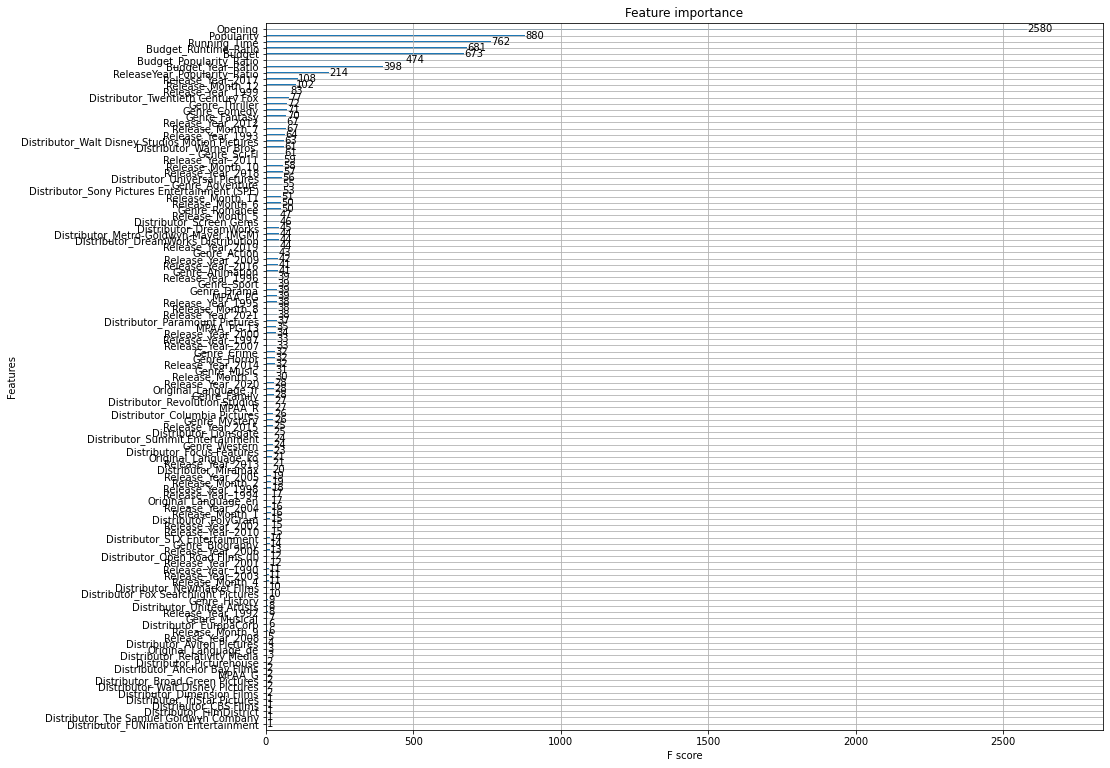

In [47]:
from bokeh.models import LabelSet, ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

train, test = train_test_split(df4, test_size = 0.2, random_state = 1)
y_train = train['Worldwide']
y_test = test['Worldwide']
x_train = train.drop(columns=['Worldwide'])
x_test = test.drop(columns=['Worldwide'])

x_test_revenue=test.pop('Worldwide')

graph_df=x_test.reset_index().join(pd.DataFrame(np.expm1(xbg_val_predictions)).rename(columns={0:'Prediction'}))
graph_df=graph_df.join(x_test_revenue.reset_index()['Worldwide'])
df_x=graph_df[['Worldwide','Prediction']]

hover1 = HoverTool(tooltips = [
            ('Revenue','@revenue'),
            ('Prediction','@prediction')
           ])


fig = figure(x_axis_label='Revenue',
             y_axis_label='prediction',
             title='Revenue vs. Prediction',
            tools=[hover1])


fig.square(x='revenue',
           y='prediction',
          source=df_x)

show(fig)

fig, ax = plt.subplots(figsize=(15, 13))
plot_importance(xgb_model, ax=ax)

plt.show()

In [48]:
test_predictions = xgb_model.predict(x_test)
test_true = y_test
fig = px.scatter(x = test_true, y = test_predictions)
fig.update_layout(
    width = 1000,
    height = 1000,
    yaxis_range=[0,2000000000],
    xaxis_range=[0,2000000000]
  )
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
fig.show()